# numpy介绍

In [15]:
import numpy as np
import time
import random

###### 比较python的list和numpy处理数据的速度

In [16]:
a = []#空列表
for  i in range(10000000):#一万
    a.append(i)

In [18]:
#通过time方法，查看list和numpy求和的执行时间
%time sum_list = sum(a)
b = np.array(a)
%time sum_np = np.sum(b)

CPU times: total: 234 ms
Wall time: 645 ms
CPU times: total: 0 ns
Wall time: 9.7 ms


        以上执行结果说明numpy的执行速度比list快（因为numpy的N维数组对象ndarray[描述相同类型的元素的集合]在存储数据的时候，数据与数据的地址都是连续的，因此批量操作数组元素时速度更快）
        N-Dimensional Array（N维数组） 的缩写

###### numpy创建对象

    ①list创建

In [24]:
score_np = np.array([[[98,92],[91,99]],[[98,92],[91,99]]])#中的参数为列表
score_np#三维ndarray对象

array([[[98, 92],
        [91, 99]],

       [[98, 92],
        [91, 99]]])

    ②从现有数组创建

In [34]:
temp1 = np.array(score_np)#深拷贝：新建ndarray
print("temp1：")
temp1
print(temp1)
temp2 = np.asarray(score_np)#浅拷贝：相当于索引的形势，并没有新建一个ndarray
print("temp2：")
print(temp2)

temp1：
[[[98 92]
  [91 99]]

 [[98 92]
  [91 99]]]
temp2：
[[[98 92]
  [91 99]]

 [[98 92]
  [91 99]]]


###### 比较深拷贝和浅拷贝

In [38]:
temp1[0][0][0] = 0
print(score_np)

[[[98 92]
  [91 99]]

 [[98 92]
  [91 99]]]


        深拷贝改变后，score_np并未改变

In [39]:
temp2[0][0][0] = 1
score_np

array([[[ 1, 92],
        [91, 99]],

       [[98, 92],
        [91, 99]]])

        浅拷贝改变后，score_np改变

###### 生成固定范围的数组

        ①np.inspace(start,stop,num,endpoint)【参数依次为：序列的起始值||序列的终止值||要生成的等间隔样例数量（默认为50）||序列中是否包含stop值（默认为true）】

In [42]:
np_linspace = np.linspace(0,100,10,False)
np_linspace

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

        ②np.arrange(start,stop,step,dtype)【参数依次为：起始值||终止值||步长（默认为1）||数据类型】

In [47]:
np_arrange = np.arange(0,100,10,int)
np_arrange

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

        ③np.logspace(start,stop,num)【start：10的开始次方||stop：10的结束次方，num：要生成的等比例数列的数量（默认值为50）】

In [54]:
np_logspace = np.logspace(1,3,3)#从10的一次方开始，到10的3次方结束，生成三个数的等比数列
np_logspace

array([  10.,  100., 1000.])

###### 创建随机数组——正态分布 

        ①从正态分布中返回若干个值：np.random.randn(d1,d2,……,dn)#生成n维的ndarray对象，形状为（d1，d2，……，dn）

In [58]:
np_random_randn = np.random.randn(3,3,3)#生成3行3列3纵的三维ndarray对象
np_random_randn

array([[[ 0.48793892,  0.41444318, -0.53979709],
        [ 0.39916467, -1.65585989,  1.13797988],
        [ 0.19740717,  1.16192541,  1.88165323]],

       [[-1.70296485,  0.23373083, -0.28140814],
        [-0.49187274,  0.35465451,  0.19561815],
        [ 0.37996984,  0.12086138, -0.16771259]],

       [[ 0.46506168,  1.55869699, -0.06851512],
        [ 0.31771478,  0.00687058, -0.96797582],
        [-1.44485989, -0.26312633, -0.98819782]]])

        ②正态分布创建：np.random.normal(1.5,10,100000000)#normal中的参数依次为：均值，标准差，正态分布数

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
random_arr = np.random.normal(1.5,10,100000000)#normal中的参数依次为：均值，标准差，正态分布数
random_arr

array([ -9.45343937,   4.44008212,  13.3579611 , ...,   3.73895863,
        -5.04824484, -13.73578631])

        画图查看生成的标准正态分布

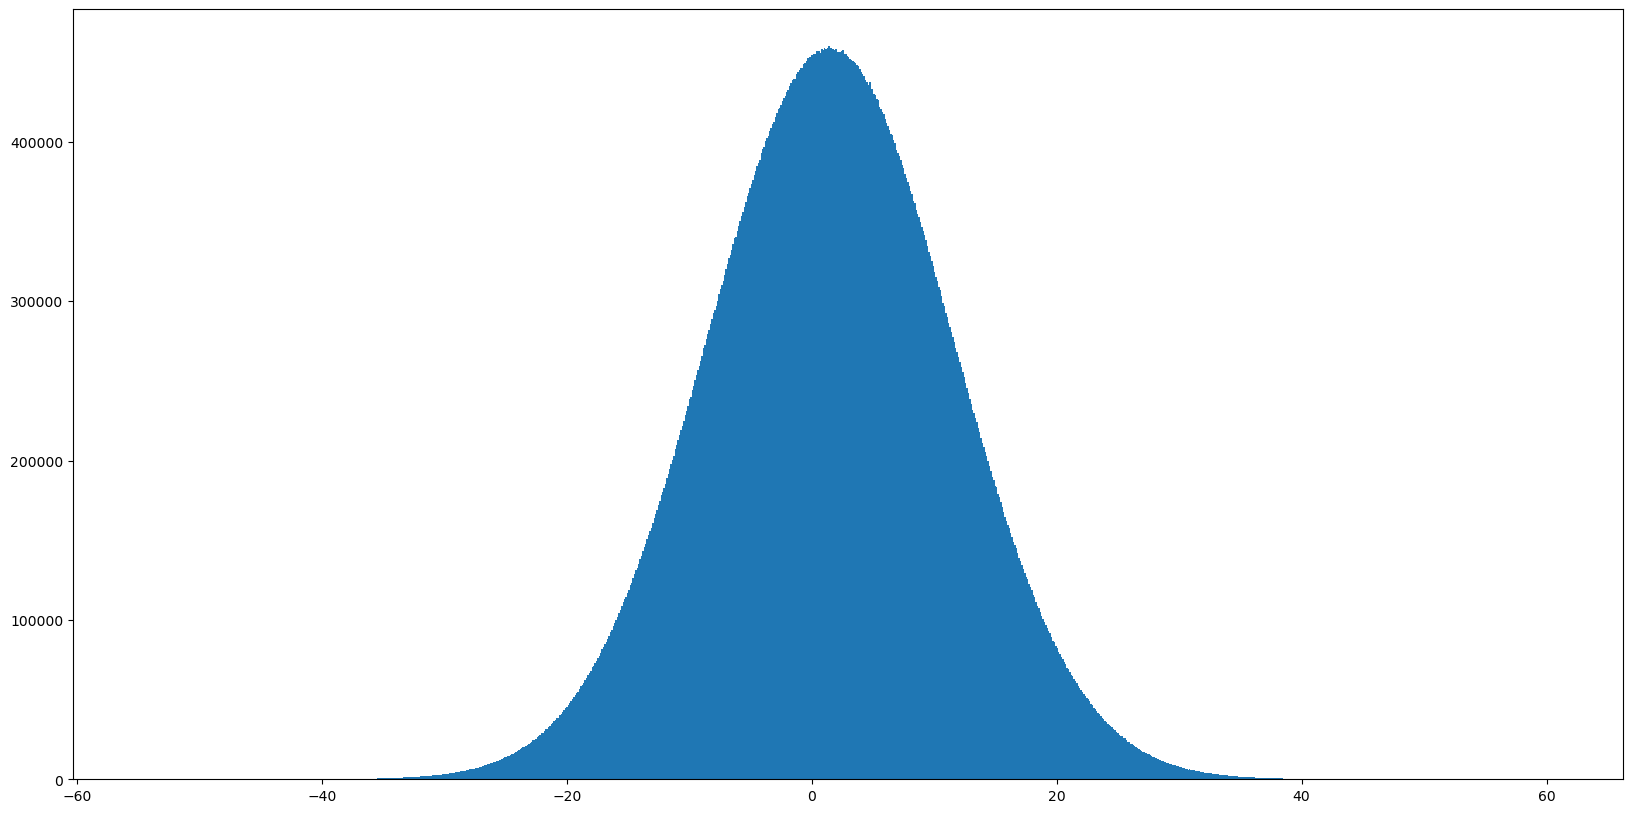

In [11]:
plt.figure(figsize=(20,10),dpi=100)
plt.hist(random_arr,1000)#分成1000组
plt.show()

###### 创建随机数组——均匀分布

        ①np.random.uniform(low,high,size)【low：采样下界||high：采样上界（左闭右开）||size：取样的形状】

In [69]:
uniform_arr = np.random.uniform(0,1000,[3,3,3])#参数依次为：下界、上界（下闭上开）、随机数个数：【三维】3*3*3个
uniform_arr

array([[[555.12875311, 398.52040307, 716.3542608 ],
        [240.61625811, 761.54862206,  67.27368927],
        [250.17066499, 485.18591852, 250.41096861]],

       [[696.5424238 , 367.37363013,  55.25228036],
        [729.99531641,   7.21589748, 731.47681125],
        [762.54638229,  80.92513634, 442.83003855]],

       [[514.84409714, 316.77426278,  92.57005338],
        [756.53661364, 442.76161119, 925.64834685],
        [313.71403518, 250.84456352, 385.23325596]]])

        ②np.random.randint(low,high,size)：从一个均匀分布中随机采样，生成一个int型数据。high为空时，在0到low之间随机取值

In [70]:
np_random_randint = np.random.randint(0,10,[3,3,3])
np_random_randint

array([[[4, 8, 3],
        [2, 1, 1],
        [6, 5, 3]],

       [[0, 6, 8],
        [8, 5, 6],
        [9, 9, 2]],

       [[1, 4, 4],
        [0, 9, 9],
        [0, 4, 2]]])

In [66]:
plt.figure(figsize=(10,10),dpi=100)
plt.hist(uniform_arr,1000)#分成1000组
plt.show()

NameError: name 'plt' is not defined

# 数组的基本操作

#### 形状修改

        ①resize(m,n)：修改数组本身的形状 
          T：将数组转置

In [82]:
arr = [[1,2],[4,5],[7,8]]#创建一个3行2列的数组
arr_np = np.array(arr)
arr_np.resize(1,6)#修改形状为1行6列
print("arr_np[1,6]：",arr_np)
print("arr_np.T：\n",arr_np.T)#转置数组

arr_np[1,6]： [[1 2 4 5 7 8]]
arr_np.T：
 [[1]
 [2]
 [4]
 [5]
 [7]
 [8]]


        ②reshape(m,n)：返回一个元素域相同但shape不同的视图：m行n列，-1代表未知

In [83]:
arr = [[1,2],[4,5],[7,8]]
arr_np = np.array(arr)
arr_np
print("arr_np.reshape([1,-1])：\n",arr_np.reshape([1,-1]))#1行未知列
print("arr_np.reshape([2,-1])：\n",arr_np.reshape([2,-1]))#2行未知列

arr_np.reshape([1,-1])：
 [[1 2 4 5 7 8]]
arr_np.reshape([2,-1])：
 [[1 2 4]
 [5 7 8]]


#### 类型修改：astype(type)

In [85]:
arr_np.astype(np.string_)#将arr_np的元素类型（由int）修改为string_
#arr_np.tostring()

array([[b'1', b'2'],
       [b'4', b'5'],
       [b'7', b'8']], dtype='|S11')

#### 数组去重：unique(列表)

In [95]:
arr_repeat = [[1,1,2,2,3,3],[4,4,5,5,6,6]]
arr_non_repeat = np.unique(arr_repeat)

In [96]:
print("arr_repeat：",arr_repeat)
print("arr_non_repeat：",arr_non_repeat)

arr_repeat： [[1, 1, 2, 2, 3, 3], [4, 4, 5, 5, 6, 6]]
arr_non_repeat： [1 2 3 4 5 6]


        以上结果表明unique函数将列表中的元素去重后，新建了一个一维的数组存储去重后的数据

# ndarray的运算

        ①逻辑运算

In [110]:
score_ndarray = np.random.randint(60,100,[10,3])#生成一个10行3列的60到100的数组
print("score_ndarray：\n",score_ndarray)

score_ndarray：
 [[76 74 88]
 [87 84 70]
 [91 79 95]
 [77 77 97]
 [83 90 97]
 [61 63 72]
 [85 78 76]
 [69 68 86]
 [71 70 73]
 [85 66 76]]


In [ ]:
score_ndarray[score_ndarray > 80] = 1 # 大于80的分数赋值1，否则赋值0
score_ndarray

        ②通用判断函数：np.all()【全满足时返回true，有一个不满足就返回false】
                   np.any()【有一个满足时返回true，全不满足时返回false】

In [111]:
print(np.all(score_ndarray[5:,:] > 80))#判断后5名同学的分数是否均大于80
print(np.any(score_ndarray[:1,:] > 85))#判断第一名同学的三科成绩有没有大于85的

False
True


        ③三元运算符：np.where()需要结合np.logical_and 和 np.logical_or 使用

In [118]:
np.where(np.logical_and(score_ndarray > 70 , score_ndarray < 90),1,0)# 满足大于70小于90的成绩记为1，否则记为0（并未改变原有数组）
score_ndarray

array([[76, 74, 88],
       [87, 84, 70],
       [91, 79, 95],
       [77, 77, 97],
       [83, 90, 97],
       [61, 63, 72],
       [85, 78, 76],
       [69, 68, 86],
       [71, 70, 73],
       [85, 66, 76]])

        ④统计运算：np.max()/min()/median()/mean()/std()/var()/argmax(axis=)/argmin(axis=)   axis表示按行取还是按列取

# numpy数组间运算
#### 运算条件：两数组的形状相同
#### 加减乘除是对应元素进行运算
#### ！两行两列的数组和两行三列的数组之间不能运算

In [130]:
ndarray1 = np.array([[1,2],[3,4]])
print("ndarray：\n",ndarray1)
print("ndarray + 3：\n",ndarray1 + 3)# 数组加某个标量：所有的元素均加上该标量
print("ndarray * 3\n",ndarray1 * 3)# 数组乘某个标量：所有元素均乘该标量
print("ndarray / 3\n",ndarray1 / 3)# 数组除某个标量：所有元素均除以该标量

ndarray：
 [[1 2]
 [3 4]]
ndarray + 3：
 [[4 5]
 [6 7]]
ndarray * 3
 [[ 3  6]
 [ 9 12]]
ndarray / 3
 [[0.33333333 0.66666667]
 [1.         1.33333333]]


In [139]:
ndarray2 = np.array([[3,2],[3,2]])
np.shape(ndarray2)
print(ndarray1 * ndarray2)

[[3 4]
 [9 8]]


#### 广播机制：扩展维度小的数组，使得他与维度最大的数组的shape值相同
#### 条件（满足其中之一即可）：①数组的某一维相【有误】等②数组的某一维度为1

In [145]:
a = np.array([1,2,3],[4,5,6])# 两行三列
b = np.array([2,1],[2,1],[2,1])# 三行两列
print(a*b)

TypeError: Field elements must be 2- or 3-tuples, got '4'